In [2]:
import hw1
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [3]:
#Problem 1
df = hw1.download_17_18_alt()
df = df.set_index('Date')

KeyError: 'Date'

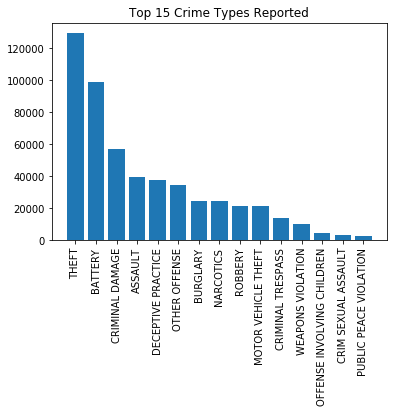

In [4]:
type_reported = df.groupby('Primary Type').size().sort_values(ascending=False)[:15]
plt.bar(type_reported.index, type_reported.values)
plt.xticks(rotation=90)
plt.title('Top 15 Crime Types Reported')
plt.show()

/home/erhla/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


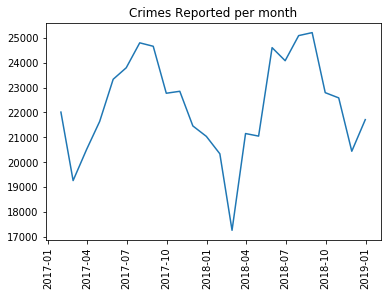

In [5]:
date_grouped = df.groupby(pd.Grouper(freq='M')).size()
plt.plot(date_grouped)
plt.title('Crimes Reported per month')
plt.xticks(rotation=90)
plt.show()

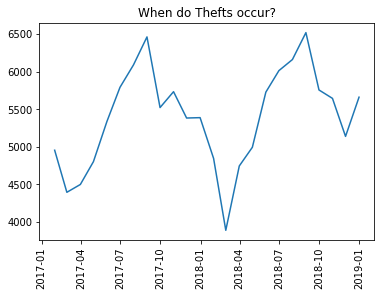

In [6]:
theft_df = df[df['Primary Type'] == 'THEFT']
date_grouped = theft_df.groupby(pd.Grouper(freq='M')).size()
plt.plot(date_grouped)
plt.title('When do Thefts occur?')
plt.xticks(rotation=90)
plt.show()

In [7]:
by_neighborhood = df.groupby('Community Area')['Primary Type'].value_counts().unstack().idxmax(axis=1)

#Violent Crime is most common
numpy.where(numpy.isin(by_neighborhood, 'BATTERY'))[0]

array([17, 18, 19, 20, 23, 25, 26, 27, 29, 30, 38, 40, 42, 43, 45, 46, 47,
       48, 49, 52, 53, 54, 55, 58, 61, 63, 66, 67, 68, 69, 71])

In [8]:
#Property Crime is most common
numpy.where(numpy.isin(by_neighborhood, 'THEFT'))[0]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 21,
       22, 24, 28, 31, 32, 33, 34, 35, 36, 37, 39, 41, 44, 50, 51, 56, 57,
       59, 60, 62, 64, 65, 70, 72, 73, 74, 75, 76, 77])

Problem 1 Writeup: The previous two cells make a simple demarkation between Chicago's neighborhoods. For some, Battery (a violent crime) is most common and for others Theft (a property crime) is most common.

In [9]:
#Problem 2
df2 = hw1.get_census_data()


In [12]:
df2.head

<bound method NDFrame.head of      [["S0101_C01_001E"  S1701_C02_001E  S1901_C01_012E  S1501_C02_015E  \
0               ["5075"            1640           40000             7.2   
1               ["6544"            1354           46050             5.7   
2               ["1068"             496           14848             6.6   
3                ["736"             289           31923            21.2   
4               ["2444"             390           49297            26.9   
5               ["5458"            1646           35581             9.8   
6               ["4669"             175           82128            35.1   
7               ["5463"             384           60017            20.3   
8               ["2268"             116           88534            74.3   
9               ["7698"            1352           51905            57.9   
10              ["2708"             590           45850            55.3   
11              ["3143"             261           88000            60.